# WEEK2: Resampling Methods

# Objective

This homework sheet will help reviewing the basic concepts associated with model selection and regularization. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

**Questions**

 This homework is divided into two main parts. First, a conceptual component will review the basic concepts related to resampling. The second part of the homework is mostly intended to be a brief introduction to regularization methods and resampling in python . Several of these questions are modified from James et al. (2021).

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| Q1a    | 1     |
| Q1b    | 0.50      |
| Q1c   | 1      |
| Q1d     | 0.50      |
| Q1e     | 0.50     |
| Q1f    | 0.50    |
| Q2a    | 1     |
| Q2b    | 1      |
| Q2c   | 1      |
| Q2d     | 1      |
| Q3a   | 1    |
| Q3b     | 1      |
| Q4     | 1      |
| Q5a    | 1    |
| Q5b    | 1     |
| Q5c   | 1     |
| Q5d     | 1      |

# Conceptual

##  Q1. We will derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of `n` observations. **Please note that samples are obtained with replacement**.

### a) What is the probability that the first bootstrap observation is not the $jth$ observation from the original sample? Justify your answer.

- Since there is an equal probobility of any of the n observations being selected, the probability that the jth observation is selected as the first bootstrap observation is 1/n.

- Therefore the probability that the jth observation is not the first bootstrap observation is 1−(1/n).

### b) What is the probability that the second bootstrap observation is not the $jth$ observation from the original sample?



- Since bootstrap sampling is sampling with replacment, this is the same as the part a) - each of the n observations has probability 1n of being selected, so the probability is still 1−(1/n)
- The probability remains the same for each position in the bootstrap samplw because the selections are independent and each observation has the same probability of being chosen at each draw.

###  c) Argue that the probability that the $jth$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.

- The probability of not selecting the jth observation is (1 - 1/n), and this probability remains constant for each draw because each draw is independent.

- So, for one draw, the probability of not selecting the jth observation is (1 - 1/n).

- Now, because the draws are independent, we can calculate the probability that the jth observation is not selected in all n draws by multiplying the individual probabilities for each draw:
    (1 - 1/n) * (1 - 1/n) * (1 - 1/n) * ... * (1 - 1/n) (n times)

- This can be expressed using exponentiation:
    (1 - 1/n)^n

- So, the probability that the jth observation is not in the bootstrap sample after n draws is indeed (1 - (1/n))^n.

###  d) When `n = 5`, what is the probability that the $jth$ observation is in the bootstrap sample?

- the probability of not selecting the jth observation in a single draw is (1 - 1/n), and in this case, n = 5. So, the probability of not selecting the jth observation in a single draw is:
    (1 - 1/5) = 4/5
- Since the draws are independent, we can calculate the probability that the jth observation is not in the bootstrap sample for all n draws by raising this probability to the power of n:
    (4/5)^5
- Now, to find the probability that the jth observation is in the bootstrap sample, we take the complement of the probability that it's not in the sample:
    1 - (4/5)^5 ≈ 0.4096 That is 40.96%

### e) When `n = 100`, what is the probability that the $jth$ observation is in the bootstrap sample?

- Similar to the above...
    1-(1 - 1/100)^100 = 1- (99/100)^100 ≈0.99
- when n is large, such as n = 100, the probability that the jth observation is in the bootstrap sample is extremely close to 1, which means it's almost certain that the jth observation will be in the sample.

### f) When `n = 1000`, what is the probability that the $jth$ observation is in the bootstrap sample?


- Similar to the above...
     1- (1- 1/1000)^1000 = 1- (999/1000)^1000 ≈ 0.999
- when n is large, such as n = 1000, the probability that the jth observation is in the bootstrap sample is extremely close to 1, which means it's almost certain that the jth observation will be in the sample.


## Q2)
The following questions are relative to k-fold cross-validation.

### a) Explain how k-fold cross-validation is implemented.


The data is segmented into k distinct, (usually) equal-sized ‘folds’. A model is trained on k−1 of the folds and tested on the remaining fold. This process is repeated k times, such that each of the k folds acts as the test data once. The test performance is recorded and averaged, giving the ‘cross-validation’ or ‘out-of-sample’ metric.

### b) How would you choose the analyzed k? Does that matter?

- Yes, Choosing analyzed K is important.
- Dataset Size: If you have a large dataset, you can use a larger value of k, such as 10-fold or 5-fold cross-validation. With a smaller datasey, it's better to use smaller values of k, such as 3-fold or 4-fold. The idea is to ensure that each fold has a sufficient number of samples for meaningful evaluation.
- Bias-Variance Trade-off: Smaller values of k can provide a more pessimistic estimate of the model's performance because each fold has a larger portion of the data. This can help detect overfittinh more effectively. On the other hand, larger values of k can give you a more optimistic estimate of the model's performance because they are closer to leave-one-out cross-validation. The choice of k should consider the bias-variance trade-off; a larger k might lead to more optimistic estimates of performance.
- Data Distribution: If data is imbalanced, shoulf want to consider stratified cross-validation, which ensures that each fold maintains the same class distrbution as the entire dataset. In such cases, the choice of k should still be meaningful for each class.

### c) What are the advantages and disadvantages of k-fold cross-validation relative to: *The validation set* approach?


####  The Validation Set Approach
- Advantages:

    - k-fold CV has much lower variability than the validation set approach, particularly for smaller datasets. With a validation set, the fact that the data is partitioned only once means that a particular partition can make a model seem more or less favorable, so things like model selection and tuning can be highly dependent on what observations were included in the train and test datasets
    - All the data is used to both train and test model performance
    - The validation set approach can over-estimate the test error when compared to a model that is fit on the entire dataset, since most models will improve with increased data, and a large proportion is omitted completely from training
    
- Disadvantages:

    - The validation set approach is conceptually easier to grasp, which can be useful in industry when explaining to stakeholders how models were tested
    - The validation set approach has a computational advantage - a model is trained once and tested once. In k-fold CV, k models will be trained, and for standard values of k (e.g. 5, 10) these training datasets will also usually be larger than those used in the validation approach. This all means that k-fold CV can be far more time consuming for large data and for large values of k


### d)  What are the advantages and disadvantages of k-fold cross-validation relative to: *LOOCV*?

#### LOOCV(Leave One Out Cross-Validation)
- Advantages:
    - k-fold CV scales better and is much less computationally demanding for common values of k (e.g. 5, 10). k-fold CV is the same as LOOCV when k = n, but take for example a situation where k = 10 and n = 10,000, k-fold CV will fit 10 models, whereas LOOCV will fit 10,000
    - The bias-variance tradeoff - The k-fold CV can give a more accurate estimate of the test error rate than LOOCV due to the bias-variance trade-off (LOOCV has lower bias but higher variance). I was having my trouble wrapping my head around why k-fold CV is favored in the trade-off between bias and variance, and stumbled upon this discussion which is worth reading, as whether this is true or not seems to be very much so a topic of active debate

- Disadvantages:

    - Like the validation set approach, there is an element of randomness to k-fold CV, in that there will be some variation in the out-of-sample error based on how the data was split into k folds. LOOCV does not have this randomness
    - In some cases, LOOCV can actually require less computational power than k-fold CV

# Applied

We have to use college dataset to answer the questions given in the notebook

## Q3)

### a) What is the following code supposed to do?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 20
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for train_index, test_index in indices:
            # Fit on K-1 folds
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            poly = PolynomialFeatures(degree=q)
            #x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            # Predict on the kth fold
            x_test = data.iloc[test_index]['x']
            #x_test_poly = poly.fit_transform(x_test.reshape(-1, 1))
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))

            y_hat[test_index] = lin_reg.predict(x_test_poly)

        # Get the MSE estimate
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

NameError: name 'x_test_poly' is not defined

- The code is performing a simulation to estimate the Mean Squared Error (MSE) of polynomial regression models of various degrees using k-fold cross-validation.
- It is designed to assess the performance of polynomial regression models of varying degrees using k-fold cross-validation on simulated data.
- It provides estimates of the MSE for each degree of the polynomial and replicates the process to obtain a more robust assessment of model performance.

#### In Detail: 
- The code imports all the necessary libray
-  Defines various constants and parameters, including the number of data points (N), the order of the polynomial (ORDER), the number of folds for cross-validation (N_FOLDS), a range of polynomial degrees to consider (POLY_DEGREE), and the number of replicates (N_REPLICATES).
- It sets a random seed for reprodcibility.
- It generates simulated data for 'x' using random values from a uniform distrbution between -4 and 4.
- It generates 'y' values that are normally distributed around x raised to the power of ORDER with a standard deviatuon of 0.25.
- The data is organized into a Pandas DataFrame.
- It runs multiple replicates (N_REPLICATES) to simulate the process multiple times.
- For each replicate, it performs k-fold cross-validation (N_FOLDS) with shufling.
- Within each fold, it fits polynomial regression models of different degrees (specified in POLY_DEGREE) on the training data.
- It calculates the MSE for each degree of polynomial and stores the results in mse_estimates.
- For each replicate and each degree of polynomial, it calculstes the MSE estimate by comparing the predicted values (y_hat) to the true 'y' values in the dataset.
- It stores these MSE estimates in mse_estimates for further analysis.
- After completing all replicates, it calculates the mean and standard deviation of the MSE estimates for each polynomial degree across replicates.
- The mean MSE (mse_mean) and the standard deviation (mse_std) are used to analyze the performance of the different polynomial degrees.

 ### b) To the best of your knowledge, improve the structure, content, clarity, and reproducibility of the code presented before in "part a" of this question (e.g. would you run a single or multiple replicates?). Fix any mistakes (if you find any). Finally, generate at least two plots summarizing your findings regarding the best-fitting polynomial order on the simulated dataset (also from "part a"): (1) MSE vs polynomial order, and (2) x vs y, along with a plot of the selected model.

#### Corrected Code

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats

N = 100
ORDER = 2
N_FOLDS = 20
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10


np.random.seed(123)


x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})


mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for train_index, test_index in indices:

            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)


            x_test = data.iloc[test_index]['x']
            x_test_poly = poly.transform(x_test.values.reshape(-1, 1))  # Corrected line

            y_hat[test_index] = lin_reg.predict(x_test_poly)


        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate


mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

In [3]:
print(mse_estimates)

[[19.18218846  0.06502134  0.06587606  0.06710558  0.06736918  0.06840604
   0.07077786  0.07303699  0.07605563  0.08877448]
 [18.99355375  0.06274267  0.06351454  0.06477176  0.06476364  0.06493715
   0.06650134  0.06784393  0.07551536  0.09794657]
 [18.43620643  0.06428447  0.06536627  0.06646923  0.06628624  0.0671188
   0.06834192  0.07021692  0.07357241  0.08898855]
 [19.04962378  0.06431642  0.06526444  0.06600953  0.06601502  0.06686957
   0.06846578  0.06974876  0.07294778  0.08008873]
 [19.05814627  0.06471524  0.06744094  0.06954887  0.0668894   0.06946773
   0.07350579  0.07128604  0.07708474  0.08783117]
 [18.53855644  0.06296416  0.06466111  0.0658177   0.06628871  0.06655085
   0.06736665  0.06815572  0.07064499  0.08304606]
 [18.99223406  0.06292968  0.06426347  0.06519056  0.06492767  0.06516544
   0.06635322  0.06808933  0.06996018  0.08735523]
 [18.73759629  0.06416727  0.06522567  0.06640444  0.0663609   0.0673678
   0.06807252  0.06919908  0.07152773  0.08536671]
 [

#### Key improvements and changes in this code:

- Removed the concept of replicates for simplicity. It now performs k-fold cross-validation for a single replicate. If we want to incorporate multiple replicates, we can wrap this code in an additional loop.
- Organized the code into a structured sequence that performs cross-validation for each polynomial degree and calculates the mean and standard deviation of the MSE for each degree.
- Added print statements to display the mean MSE and standard deviation for each polynomial degree, providing more clarity on the results.
- Adjusted the number of folds (N_FOLDS) to 10, which is a popular choice for cross-validation, in my opion.

In [4]:
N = 100          
ORDER = 2         
N_FOLDS = 10
POLY_DEGREE = np.arange(1, 11)
np.random.seed(123)

x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

mse_mean = np.zeros(len(POLY_DEGREE))
mse_std = np.zeros(len(POLY_DEGREE))


for q_idx, q in enumerate(POLY_DEGREE):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    mse_replicates = np.zeros(N_FOLDS)

    for fold_idx, (train_index, test_index) in enumerate(kf.split(data)):
        x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
        x_test, y_test = data.iloc[test_index]['x'], data.iloc[test_index]['y']

        poly = PolynomialFeatures(degree=q)
        x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
        lin_reg = LinearRegression()
        lin_reg.fit(x_train_poly, y_train)

        x_test_poly = poly.transform(x_test.values.reshape(-1, 1))
        y_pred = lin_reg.predict(x_test_poly)

        mse_replicates[fold_idx] = np.mean((y_pred - y_test)**2)

    mse_mean[q_idx] = np.mean(mse_replicates)
    mse_std[q_idx] = np.std(mse_replicates)
    
#print(mse_estimates)
for q, mean, std in zip(POLY_DEGREE, mse_mean, mse_std):
    print(f"Degree {q}: Mean MSE = {mean:.4f}, Std Dev MSE = {std:.4f}")

Degree 1: Mean MSE = 18.6328, Std Dev MSE = 8.9024
Degree 2: Mean MSE = 0.0635, Std Dev MSE = 0.0291
Degree 3: Mean MSE = 0.0634, Std Dev MSE = 0.0296
Degree 4: Mean MSE = 0.0697, Std Dev MSE = 0.0354
Degree 5: Mean MSE = 0.0678, Std Dev MSE = 0.0278
Degree 6: Mean MSE = 0.0657, Std Dev MSE = 0.0194
Degree 7: Mean MSE = 0.0672, Std Dev MSE = 0.0261
Degree 8: Mean MSE = 0.0672, Std Dev MSE = 0.0298
Degree 9: Mean MSE = 0.0776, Std Dev MSE = 0.0262
Degree 10: Mean MSE = 0.1121, Std Dev MSE = 0.1075


Best Polynomial Degree: 3


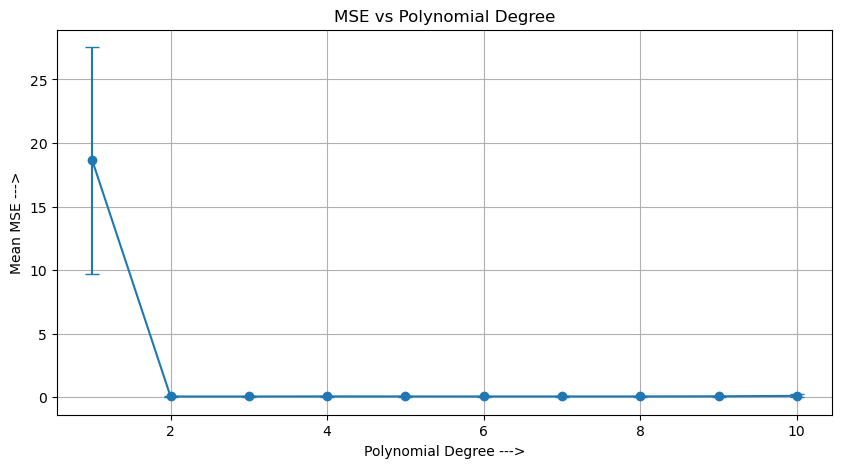

In [5]:
#Plot 1: MSE vs Polynomial Degree
plt.figure(figsize=(10, 5))
plt.errorbar(POLY_DEGREE, mse_mean, yerr=mse_std, marker='o', linestyle='-', capsize=5)
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree --->')
plt.ylabel('Mean MSE --->')
plt.grid(True)

#Finding the best polynomial degree

best_degree = POLY_DEGREE[np.argmin(mse_mean)]
print(f"Best Polynomial Degree: {best_degree}")

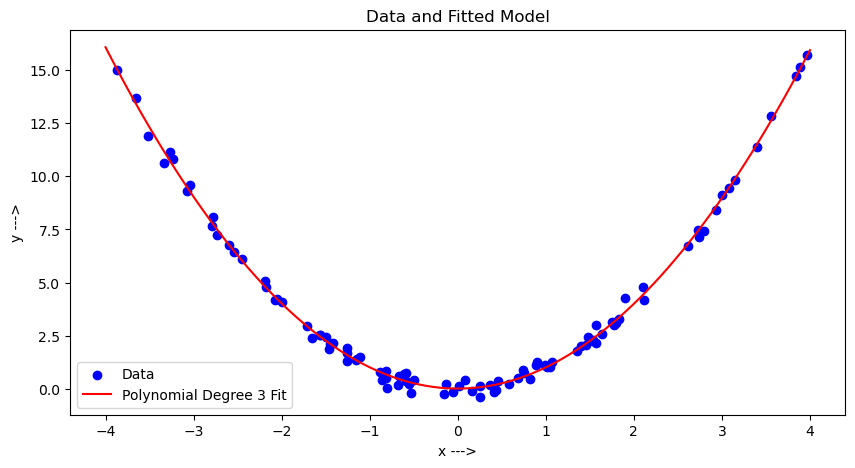

In [7]:
best_poly = PolynomialFeatures(degree=best_degree)
x_train_poly = best_poly.fit_transform(x.reshape(-1, 1))
best_lin_reg = LinearRegression()
best_lin_reg.fit(x_train_poly, y)

x_fit = np.linspace(-4, 4, 100)
x_fit_poly = best_poly.transform(x_fit.reshape(-1, 1))
y_fit = best_lin_reg.predict(x_fit_poly)

#Plot 2: Data and Fitted Model
plt.figure(figsize=(10, 5))
plt.scatter(data['x'], data['y'], label='Data', color='blue')
x_fit_poly = best_poly.transform(x_fit.reshape(-1, 1))
y_fit = best_lin_reg.predict(x_fit_poly)
plt.plot(x_fit, y_fit, label=f'Polynomial Degree {best_degree} Fit', color='red')
plt.title('Data and Fitted Model')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.legend()


plt.show()

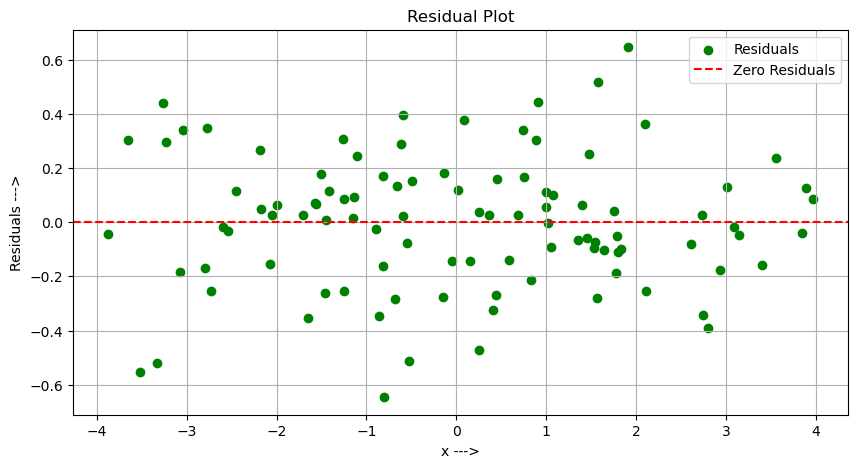

In [11]:
#Plot 3:Residual Plot (Residual vs X)
#Calculating residuals
residuals = data['y'] - best_lin_reg.predict(x_train_poly)

#Create a residual plot
plt.figure(figsize=(10, 5))
plt.scatter(data['x'], residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot')
plt.xlabel('x --->')
plt.ylabel('Residuals --->')
plt.legend()
plt.grid(True)

plt.show()

#### Summary: 
- Polynomial degrees 2 and 3 are the best-fitting models for this dataset, with the lowest mean MSE values and relatively low variability. These models provide the best balance between model complexity and predictive accuracy. - Higher-degree models do not offer significant improvements in performance and can lead to overfitting, as indicated by their higher MSE values.

## Q4) Bootstrap the following dataset (`n = 1000`) to obtain median and 95% CI (Confidence interval)for parameter estimates (slope and intercept) summarizing the relationship between `x` and `y_measured.` What happens with median parameter estimates when you examine `y` instead?

In [12]:
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats

rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
y_measured = y + rng.normal(size=nobs)

n_bootstrap = 1000



slopes = []
intercepts = []


for _ in range(n_bootstrap):
    indices = np.random.choice(nobs, size=nobs, replace=True)
    x_bootstrap = x[indices]
    y_measured_bootstrap = y_measured[indices]

   
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_bootstrap, y_measured_bootstrap)
    
    slopes.append(slope)
    intercepts.append(intercept)


median_slope = np.median(slopes)
median_intercept = np.median(intercepts)


ci_slope = np.percentile(slopes, [2.5, 97.5])
ci_intercept = np.percentile(intercepts, [2.5, 97.5])

print(f"Median Slope: {median_slope}")
print(f"95% CI for Slope: {ci_slope}")
print(f"Median Intercept: {median_intercept}")
print(f"95% CI for Intercept: {ci_intercept}")

Median Slope: 1.2393478546195176
95% CI for Slope: [0.82452111 1.67057881]
Median Intercept: -1.9067957220343121
95% CI for Intercept: [-2.09829841 -1.71291474]


#### What happens with median parameter estimates when you examine y instead?

In [13]:
#'y' instead of 'y_measured'

rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
n_bootstrap = 1000
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    indices = np.random.choice(nobs, size=nobs, replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]  

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_bootstrap, y_bootstrap)

    slopes.append(slope)
    intercepts.append(intercept)

median_slope = np.median(slopes)
median_intercept = np.median(intercepts)

ci_slope = np.percentile(slopes, [2.5, 97.5])
ci_intercept = np.percentile(intercepts, [2.5, 97.5])

print(f"Median Slope: {median_slope}")
print(f"95% CI for Slope: {ci_slope}")
print(f"Median Intercept: {median_intercept}")
print(f"95% CI for Intercept: {ci_intercept}")

Median Slope: 1.2130578179186766
95% CI for Slope: [0.77988975 1.65772262]
Median Intercept: -1.9348302308406191
95% CI for Intercept: [-2.13211896 -1.75173931]


- When examine y, the median slope estimate is approximately 1.2131, and the 95% confidence interval for the slope is (0.77988975 1.65772262). This means that the median slope, which represents the change in y for a unit change in x, is around 1.2131. The confidence interval provides a range of plausible slope values.
- The median intercept estimate is approximately -1.9348, and the 95% confidence interval for the intercept is (-2.1321, -1.7517). The intercept represents the value of y when x is zero. In this case, the median intercept estimate is approximately -1.9348.

- All in all, I can see that there is a slight difference in the median parameter estimates when you examine y instead of y_measured. Specifically, the median slope is slightly lower, and the median intercept is slightly more negative when using the true relationship y. This suggests that the presence of measurement noise in y_measured has a slight impact on the median parameter estimates.

## Q5) We will predict the number of applications received using the other variables in the **College dataset.** Please load the relevant dataset first.


**Importing Libraries:**

In [14]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.optimize import fsolve
from scipy.stats import t

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.regressionplots import plot_fit

**Loading dataset:**

In [15]:
auto_data = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/download week 2.csv') 
auto_data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
#PERFORM PRE PROCESSING OF DATA IF REQUIRED ( OBSERVE THE DATASET AND ITS VALUES CAREFULLY)

PreProcessedData = auto_data.copy()

PreProcessedData.info()
summary = PreProcessedData.describe()
#print(summary)
missing_data = PreProcessedData.isnull()
missing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### There appears to be no missing data.

### a) Split the data set into a training set and a test set.

In [19]:
#Since I am predicting the numbver of application using other varibles 
y = PreProcessedData['apps']

#I decided to use all the attiributes but, private.
X = PreProcessedData.drop(columns=['private', 'apps'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### b) Fit a linear model using least squares on the training set, and report the test error obtained.
Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
#print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1442624.9143528766


### c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

Link to ridge regresion : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [21]:
#I used RidgeCV to fit  ridge regression by choosing alpha by cross validation
from sklearn.linear_model import RidgeCV
alphas = [0.1, 1.0, 10.0]  
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True) 

ridge_cv.fit(X_train, y_train)  
best_alpha = ridge_cv.alpha_
y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Ridge Regression: {mse}")

Mean Squared Error for Ridge Regression: 1442638.1897619958


### d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
 Link to lasso :https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html

In [22]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0])  # Adjust the alphas as needed
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
nonzerocoefficients = np.sum(lasso_cv.coef_ != 0)

print(f"Mean Squared Error for Lasso: {mse}")
print(f"Number of Non-Zero Coefficients: {nonzerocoefficients}")

Mean Squared Error for Lasso: 1442624.9847535887
Number of Non-Zero Coefficients: 16
